## QUANTIUM DATA ANALYTICS FOR SALE

#### As part of Quantium’s retail analytics team; your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region. The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import re
import matplotlib.style as style

#### Reading in Data Sets

In [2]:
#Loading the datasets
#trans for Transaction
#beh for PurchaseBehaviour
trans =  pd.read_csv("Transactions.csv")
beh =pd.read_csv("PurchaseBehaviour.csv")

In [3]:
#Viewing the first 11 data in Transaction
trans.head(11)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [4]:
##Viewing the first 11 data in PurchaseBehaviour
beh.head(11)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [5]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
beh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


### Data Cleaning

#### Transaction Table¶
1) Conversion to date format for transaction table

2) Checking if Store Numbers, Product numbers and Loyalty Card Numbers are labels since they identify the unique customers, products and stores.

3) Creating columns for transaction table based on product name, such as Brand name, pkg weight, and product description.

4) Checking product description to identify chips from other products if any, product description frequency of words. Selecting only chips product

5) Checking the summary of data. Identify and remove outliers if any. Check for null values, data types etc.

6) Left join the transaction table with behaviour table to add life stage anad premium details.

In [7]:
base_date = pd.Timestamp('1899-12-30')
trans.DATE= trans['DATE'].map(lambda x: base_date + pd.DateOffset(x))
trans['DATE'] = trans['DATE'].map(lambda x:x.date())

In [8]:
#Creating a new DAY column containing weekday name of the transaction:

trans['DAY'] = trans['DATE'].map(lambda x: x.strftime("%A") )

In [9]:
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Wednesday
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,Tuesday
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Monday
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Friday
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Saturday


In [10]:
# Extracting product weight from the PROD_NAME colmun and storing it in a new PROD_WEIGHT column:

trans['PROD_WEIGHT'] = trans['PROD_NAME'].map(lambda x: float(''.join(re.findall(r'\d+', x))))

In [11]:
#Removing the product weight information from PROD_NAME column:

trans['PROD_NAME'] = trans['PROD_NAME'].map(lambda x: ''.join(re.findall(r'\D+', x))[:-1])

In [12]:
# Checking for products that are chips:


trans['Is_Chip'] = trans['PROD_NAME'].map(lambda x: 'chip' in x.lower())
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY,PROD_WEIGHT,Is_Chip
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,Wednesday,175.0,True
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,Tuesday,175.0,False
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,Monday,170.0,True
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,Friday,175.0,True
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,Saturday,150.0,False


In [13]:
# Removing products from data that aren't chips:


trans.drop(trans[trans['Is_Chip'] == False].index, inplace = True) 
trans.drop(['Is_Chip'], axis = 1, inplace = True)



In [14]:
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY,PROD_WEIGHT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,Wednesday,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,Monday,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,Friday,175.0
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,Thursday,330.0
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,Monday,150.0


In [15]:
# The name of the brand of the product is the first word of PROD_NAME

# Extracting brand name and storing in a new BRAND column:

trans['PROD_NAME'][0].split(' ', 1)[0]

'Natural'

In [16]:

trans['BRAND'] = trans['PROD_NAME'].map(lambda x: x.split(' ', 1)[0])
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY,PROD_WEIGHT,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,Wednesday,175.0,Natural
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,Monday,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,Friday,175.0,Smiths
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,Thursday,330.0,Smiths
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,Monday,150.0,Doritos


In [17]:
# Checking if there are any nulls in the data:


trans.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
DAY               0
PROD_WEIGHT       0
BRAND             0
dtype: int64

In [18]:
trans['STORE_NBR'] = trans['STORE_NBR'].astype('object')
trans['LYLTY_CARD_NBR'] = trans['LYLTY_CARD_NBR'].astype('object')
trans['PROD_NBR'] = trans['PROD_NBR'].astype('object')
trans['TXN_ID'] = trans['TXN_ID'].astype('object')

In [19]:
trans.describe()

,PROD_QTY,TOT_SALES,PROD_WEIGHT
count,74570.000000,74570.000000,74570.000000
mean,1.904264,6.860511,179.815140
std,0.343675,2.256661,59.017981
min,1.000000,1.900000,110.000000
25%,2.000000,5.800000,160.000000
50%,2.000000,6.600000,175.000000
75%,2.000000,7.800000,175.000000
max,5.000000,29.500000,380.000000


##### Looks like there are no missing values in the data so far and from the min/max range it looks like we have outliers. Lets first analyze the data based on product name and see if it still exists.

Product name can be seperated into brand name, product packing dimensions and descrpiton of the product

In [20]:
# Extracting first name from product name which is the brand name


trans['BRAND_NAME']=trans['PROD_NAME'].apply(lambda x: x.split(" ")[0])

In [21]:
# extracting the last word from product namewhich is the pkg details


trans['PROD_PKG']=trans['PROD_NAME'].apply(lambda x: x.split(" ")[-1])

In [22]:
# removing the first word from product name


trans['PROD_DESC'] = trans['PROD_NAME'].str.split(n=1).str[1]

In [23]:
# also removing the last word further to get the product description


trans['PROD_DESC']=trans['PROD_DESC'].str.rsplit(' ',1).str[0]

In [24]:
trans

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY,PROD_WEIGHT,BRAND,BRAND_NAME,PROD_PKG,PROD_DESC
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,Wednesday,175.0,Natural,Natural,SeaSalt,Chip Compny
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,Monday,170.0,Smiths,Smiths,,Crinkle Cut Chips Chicken
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,Friday,175.0,Smiths,Smiths,,Chip Thinly S/Cream&Onion
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,Thursday,330.0,Smiths,Smiths,,Crinkle Chips Salt & Vinegar
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,Monday,150.0,Doritos,Doritos,,Corn Chip Mexican Jalapeno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264815,2018-11-04,271,271193,269365,33,Cobs Popd Swt/Chlli &Sr/Cream Chips,2,7.6,Sunday,110.0,Cobs,Cobs,,Popd Swt/Chlli &Sr/Cream Chips
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips,2,7.6,Wednesday,110.0,Cobs,Cobs,,Popd Sea Salt Chips
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips,2,7.6,Monday,110.0,Cobs,Cobs,,Popd Sea Salt Chips
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy,2,6.6,Monday,175.0,Thins,Thins,,Chips Light& Tangy


In [25]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74570 entries, 0 to 264834
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            74570 non-null  object 
 1   STORE_NBR       74570 non-null  object 
 2   LYLTY_CARD_NBR  74570 non-null  object 
 3   TXN_ID          74570 non-null  object 
 4   PROD_NBR        74570 non-null  object 
 5   PROD_NAME       74570 non-null  object 
 6   PROD_QTY        74570 non-null  int64  
 7   TOT_SALES       74570 non-null  float64
 8   DAY             74570 non-null  object 
 9   PROD_WEIGHT     74570 non-null  float64
 10  BRAND           74570 non-null  object 
 11  BRAND_NAME      74570 non-null  object 
 12  PROD_PKG        74570 non-null  object 
 13  PROD_DESC       74570 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.0+ MB


In [26]:
beh.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [27]:
# Carrying out a LEFT JOIN between t_data and pb_data:

combined_data= pd.merge(trans,beh,on='LYLTY_CARD_NBR',how='left')
combined_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY,PROD_WEIGHT,BRAND,BRAND_NAME,PROD_PKG,PROD_DESC,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,Wednesday,175.0,Natural,Natural,SeaSalt,Chip Compny,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,Monday,170.0,Smiths,Smiths,,Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,Friday,175.0,Smiths,Smiths,,Chip Thinly S/Cream&Onion,MIDAGE SINGLES/COUPLES,Budget
3,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,Thursday,330.0,Smiths,Smiths,,Crinkle Chips Salt & Vinegar,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,Monday,150.0,Doritos,Doritos,,Corn Chip Mexican Jalapeno,MIDAGE SINGLES/COUPLES,Budget


In [28]:
# Checking if there are any nulls in the data:

combined_data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
DAY                 0
PROD_WEIGHT         0
BRAND               0
BRAND_NAME          0
PROD_PKG            0
PROD_DESC           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [29]:
# Saving the combined data as a csv file:


combined_data.to_csv(r'combinedData.csv', header=True)

## EXPLORATORY DATA ANALYSIS

In [30]:
combined_data.shape

(74570, 16)

In [31]:
combined_data.PROD_NAME.describe()

count                                    74570
unique                                      33
top       Cobs Popd Swt/Chlli &Sr/Cream Chips 
freq                                      3269
Name: PROD_NAME, dtype: object

In [32]:
combined_data.PROD_QTY.describe()

count    74570.000000
mean         1.904264
std          0.343675
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: PROD_QTY, dtype: float64

In [33]:
combined_data.TOT_SALES.describe()

count    74570.000000
mean         6.860511
std          2.256661
min          1.900000
25%          5.800000
50%          6.600000
75%          7.800000
max         29.500000
Name: TOT_SALES, dtype: float64

In [34]:
combined_data.PROD_WEIGHT.describe()

count    74570.000000
mean       179.815140
std         59.017981
min        110.000000
25%        160.000000
50%        175.000000
75%        175.000000
max        380.000000
Name: PROD_WEIGHT, dtype: float64

In [35]:
combined_data.BRAND.describe()

count      74570
unique         8
top       Smiths
freq       16872
Name: BRAND, dtype: object

In [36]:
combined_data.LIFESTAGE.describe()

count                     74570
unique                        7
top       OLDER SINGLES/COUPLES
freq                      15304
Name: LIFESTAGE, dtype: object

In [37]:
combined_data.PREMIUM_CUSTOMER.describe()

count          74570
unique             3
top       Mainstream
freq           28539
Name: PREMIUM_CUSTOMER, dtype: object

In [38]:
combined_data.DATE.describe()

count          74570
unique           364
top       2018-12-24
freq             285
Name: DATE, dtype: object

In [39]:
combined_data.DATE.max()

datetime.date(2019, 6, 30)

In [40]:
# Searching for the missing date:

pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(combined_data.DATE)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

##### INSIGHTS:

1. There is no record for 2018-12-25 because it was christmas and the shop was closed so no transactions took place.
2. 74570 out of 264836 transactions were made for chips products, which is almost 28% of total transactions.
3. Cobs Popd Swt/Chlli &Sr/Cream Chips was the most famous chips during the specified period.
4. Smiths was the most famous chips brand during the specified period.
5. Most of the customers bought products of quantity 2.
6. Most of the customers bought products that weighed 175g.
7. Most of the customers were 'Older Singles/Couples'.
8. Most of the customers purchased mainstream products.

## DATA VISUALIZATION

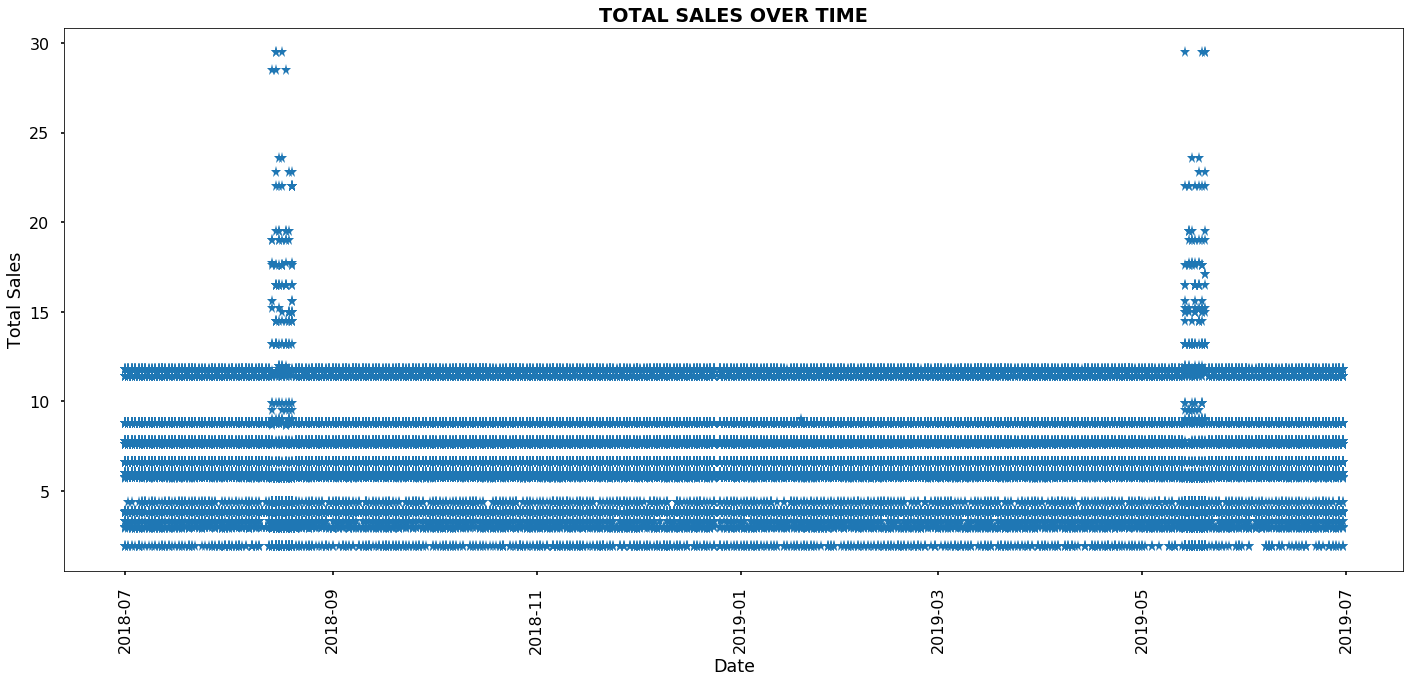

In [41]:
style.use('seaborn-poster')

plt.figure(figsize=(24,10))
combined_data = combined_data.sort_values('DATE', ascending=True)
plt.plot(combined_data['DATE'], combined_data['TOT_SALES'],'*')
plt.xticks(rotation='vertical')
plt.title('TOTAL SALES OVER TIME',fontweight='bold')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.show()

### INSIGHTS:

1. There is a surge in total sales around october 2018 and june 2019
2. These is a small gap in december 2019 which is accounted by the missing record on 2018-12-25

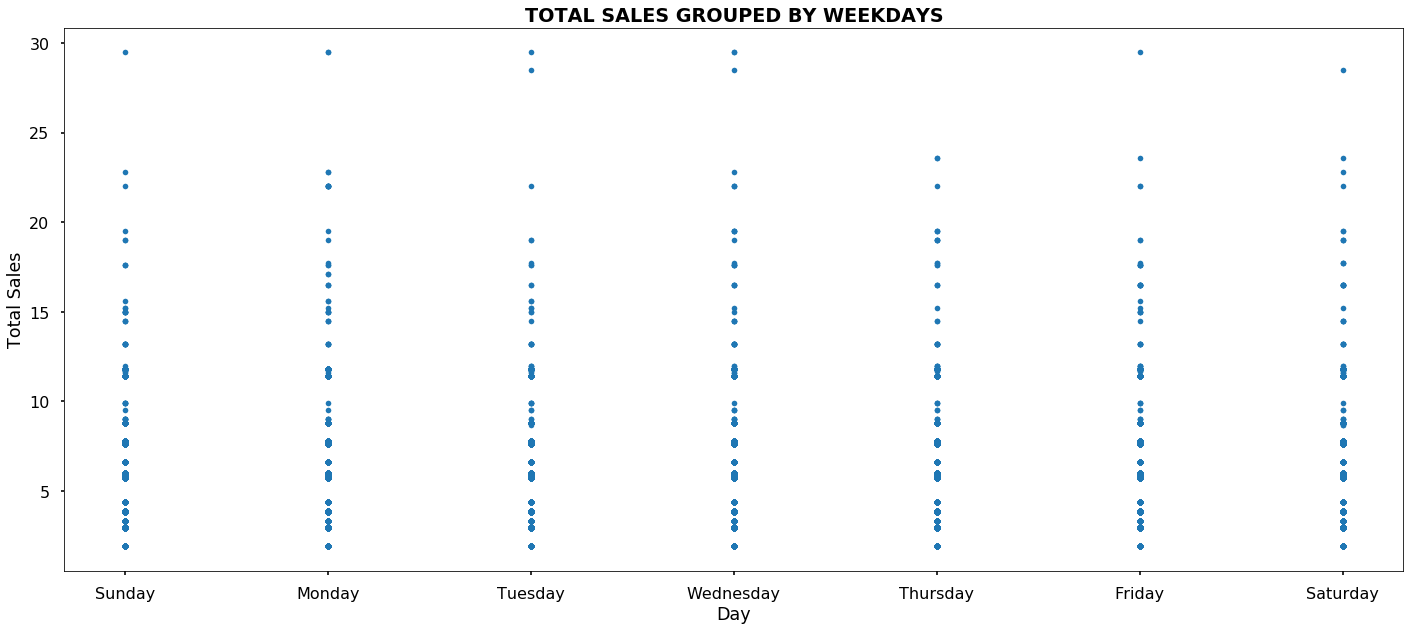

In [42]:
plt.figure(figsize=(24,10))
plt.plot(combined_data['DAY'], combined_data['TOT_SALES'], '.')
plt.title('TOTAL SALES GROUPED BY WEEKDAYS',fontweight='bold')
plt.ylabel('Total Sales')
plt.xlabel('Day')
plt.show()

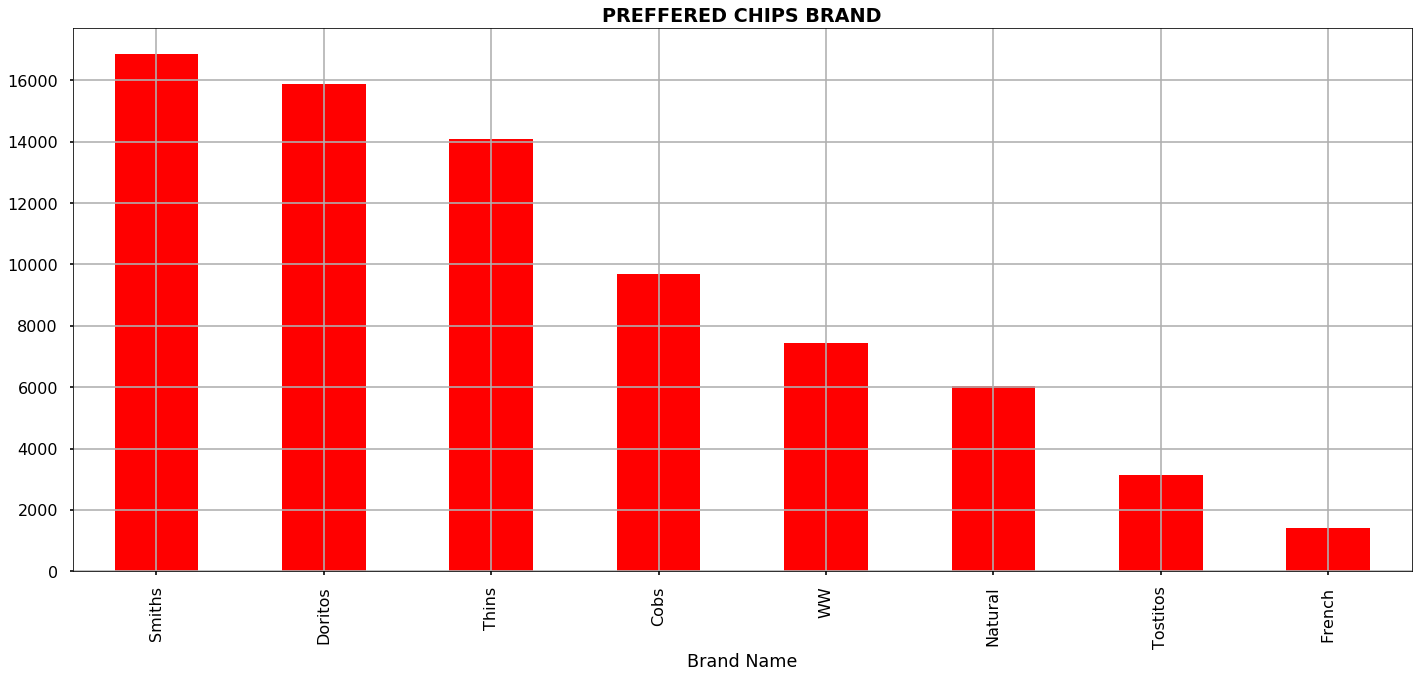

In [43]:
# INSIGHTS:

# Total sales are the lowest on thursdays


plt.figure(figsize=(24,10))
combined_data.BRAND.value_counts().plot(kind='bar',color='r',grid=True)
plt.title('PREFFERED CHIPS BRAND',fontweight='bold')
plt.xlabel('Brand Name')
plt.show()

### INSIGHTS:

1. Smiths is the most preferred brand
2. French is the least preferred brand

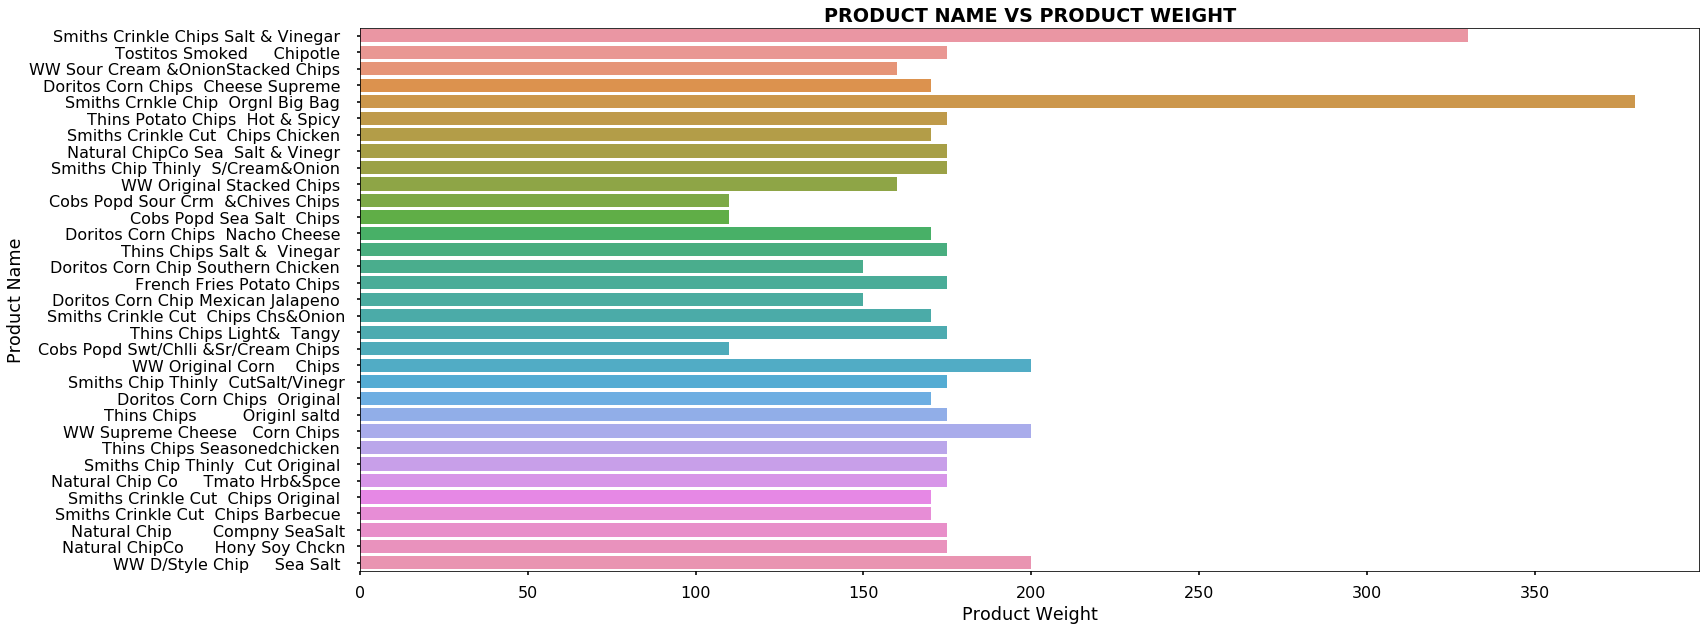

In [44]:
plt.figure(figsize=(24,10))
sns.barplot(x=combined_data['PROD_WEIGHT'], y=combined_data['PROD_NAME'])
plt.title('PRODUCT NAME VS PRODUCT WEIGHT',fontweight='bold')
plt.ylabel('Product Name')
plt.xlabel('Product Weight')
plt.show()

### INSIGHTS:

1. Most of the customers preferred Smiths Crinkle Chip Orgnl Big Bag & Smiths Crinkle Chip Salt & Vinegar when buying heavy weighted chips product.
2. Cobs Popd Swt/Chlli &Sr/Cream Chips is the most preferred chips but is the least weighted product.

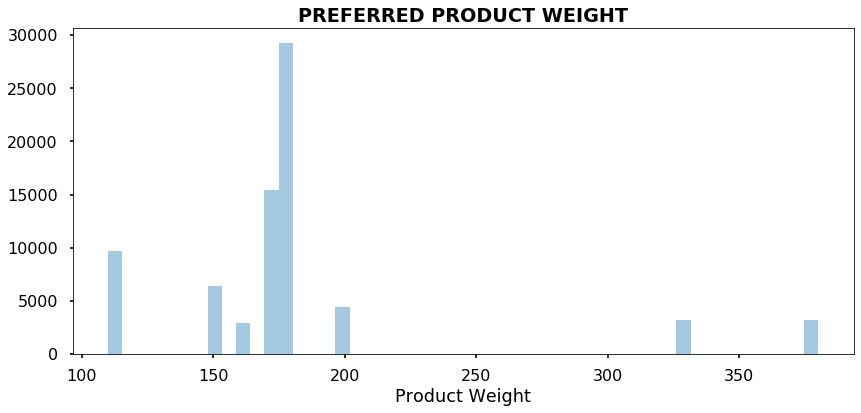

In [45]:
plt.figure(figsize=(14,6))
sns.distplot(a=combined_data['PROD_WEIGHT'], kde=False)
plt.title('PREFERRED PRODUCT WEIGHT',fontweight='bold')
plt.xlabel('Product Weight')
plt.show()

#### INSIGHTS:

1. Most of the customers prefer to buy products that weigh between 150-200g
2. Very few customers prefer products that weigh more than 350g

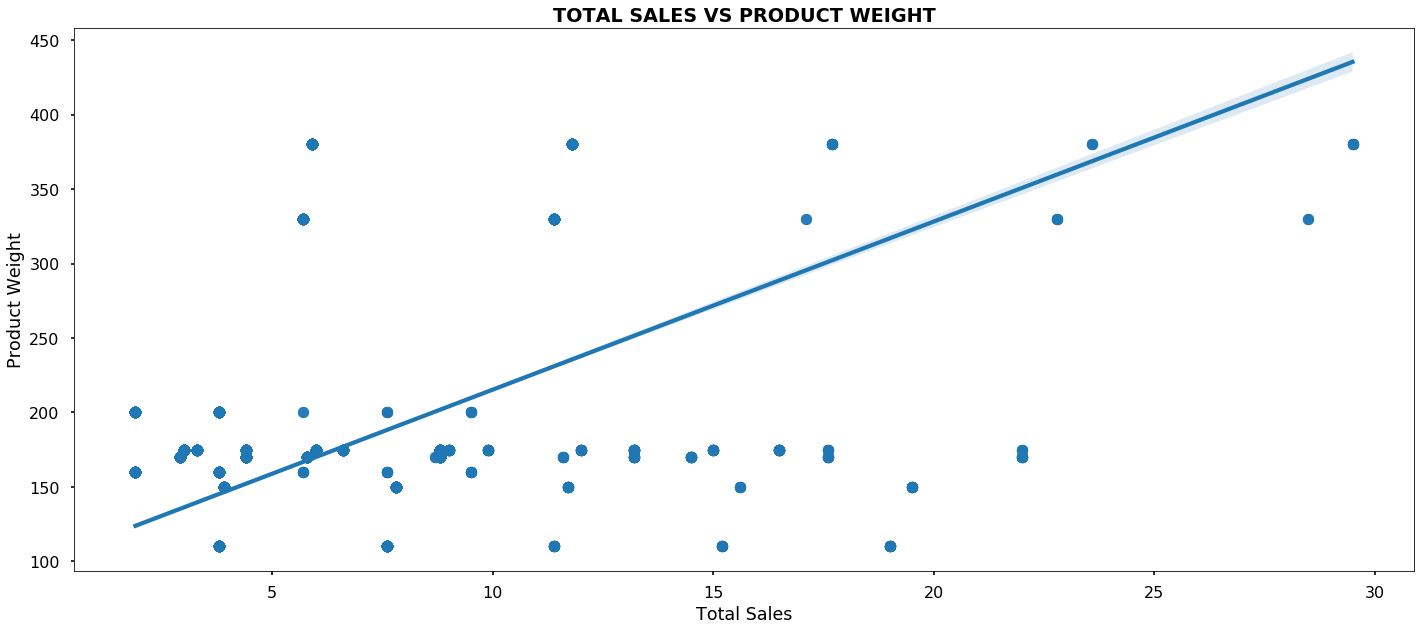

In [46]:
plt.figure(figsize=(24,10))
sns.regplot(x=combined_data['TOT_SALES'], y=combined_data['PROD_WEIGHT'])
plt.title('TOTAL SALES VS PRODUCT WEIGHT',fontweight='bold')
plt.ylabel('Product Weight')
plt.xlabel('Total Sales')
plt.show()

### INSIGHTS:

1. There is almost a linear relationship between total sales and product weight, meaning the total sales increase as product weight increases ( quite obvious )
2. Low weighted products contribute to total sales the most

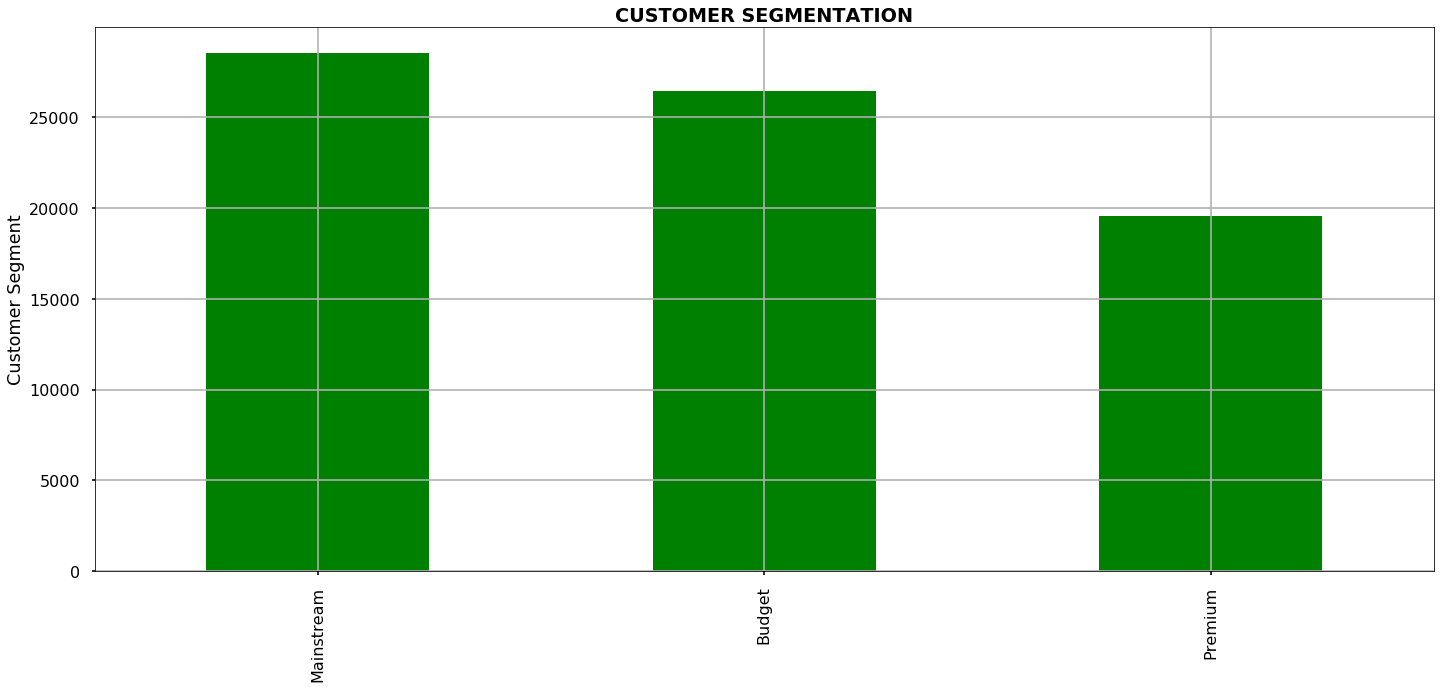

In [47]:
plt.figure(figsize=(24,10))
combined_data.PREMIUM_CUSTOMER.value_counts().plot(kind='bar',color='g',grid=True)
plt.title('CUSTOMER SEGMENTATION',fontweight='bold')
plt.ylabel('Customer Segment')
plt.show()

### INSIGHTS:

1. Most of the customers buy mainstream products
2. Less amount of customers buy premium products

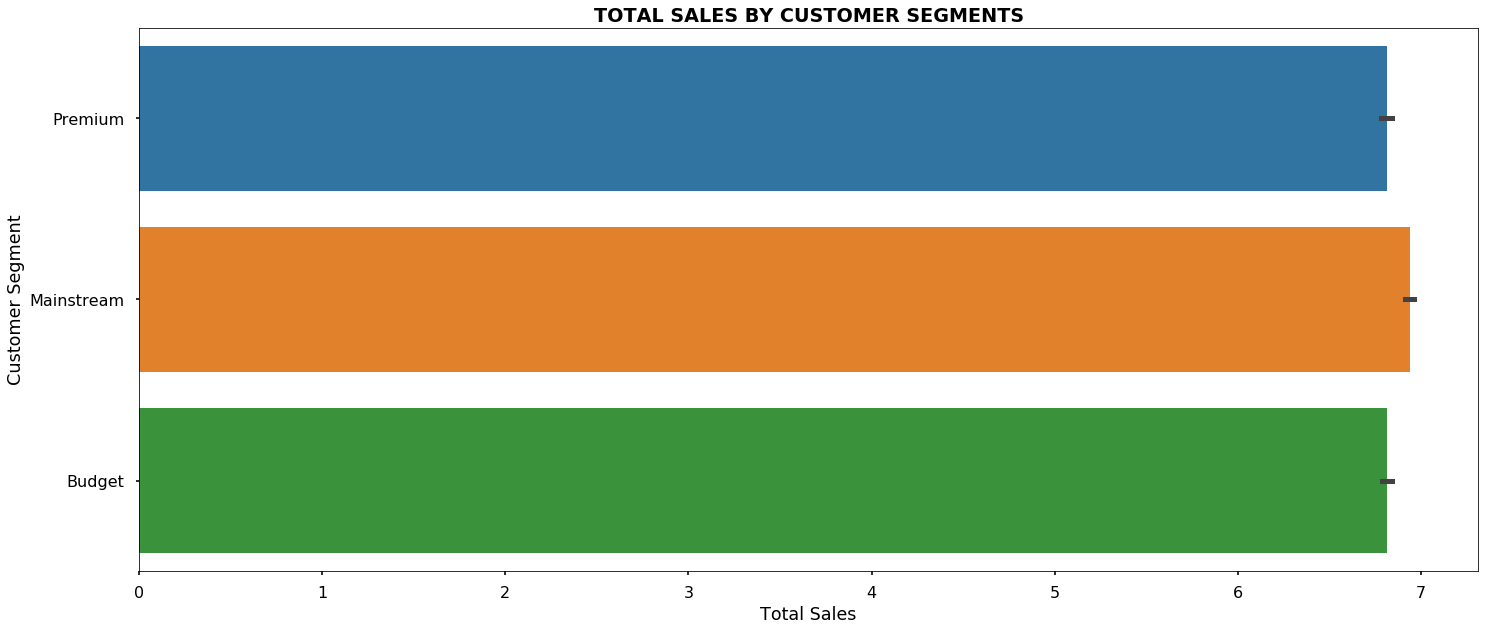

In [48]:
plt.figure(figsize=(24,10))
sns.barplot(x=combined_data['TOT_SALES'], y=combined_data['PREMIUM_CUSTOMER'])
plt.title('TOTAL SALES BY CUSTOMER SEGMENTS',fontweight='bold')
plt.ylabel('Customer Segment')
plt.xlabel('Total Sales')
plt.show()

### INSIGHTS:

1. Mainstream products generate maximum amount of sales
2. Budget products generate least amount of sales

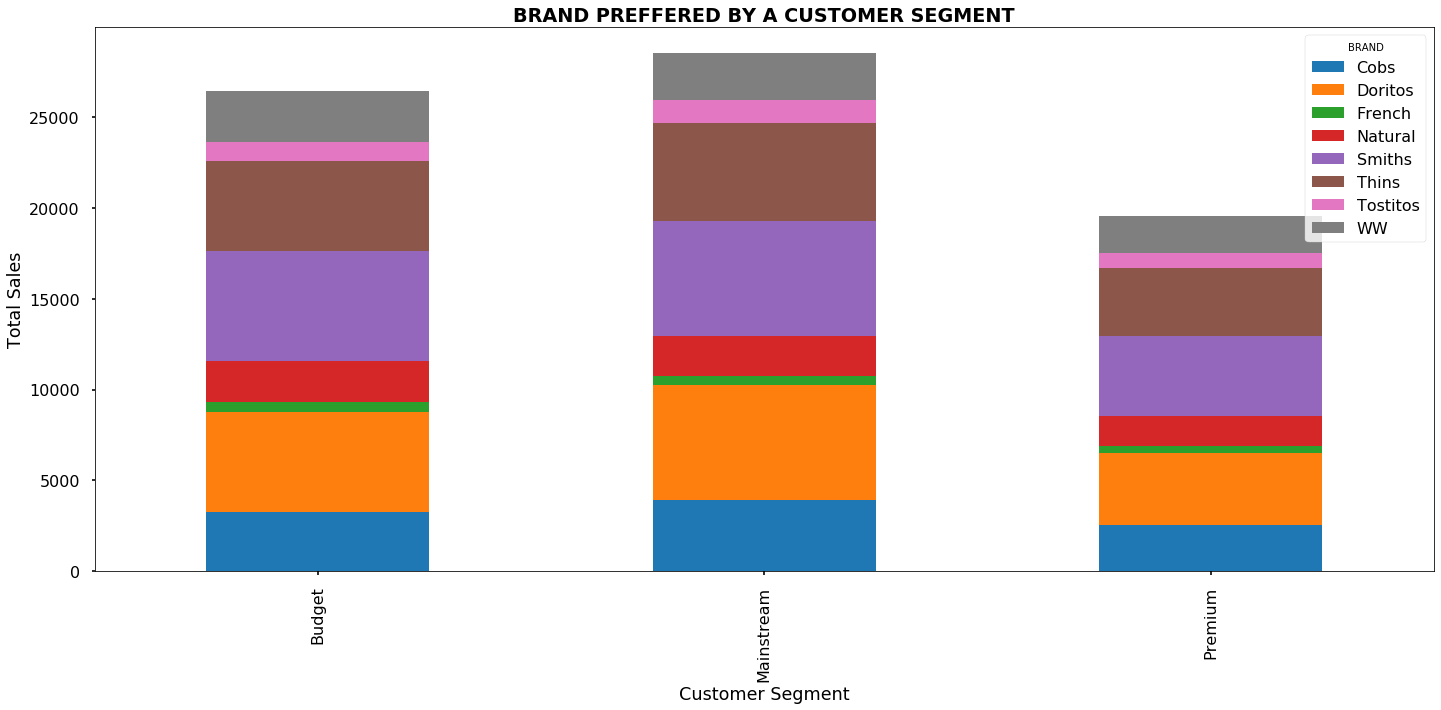

In [49]:
plt.rcParams['figure.figsize'] = (24, 10)
combined_data.groupby(['PREMIUM_CUSTOMER','BRAND']).size().unstack().plot(kind='bar',stacked=True)
plt.title('BRAND PREFFERED BY A CUSTOMER SEGMENT',fontweight='bold')
plt.ylabel('Total Sales')
plt.xlabel('Customer Segment')
plt.show()

### INSIGHTS:

1. Smiths is the preferred brand by all types of customers.
2. Doritos is also a more preferred brand by the mainstream customers.

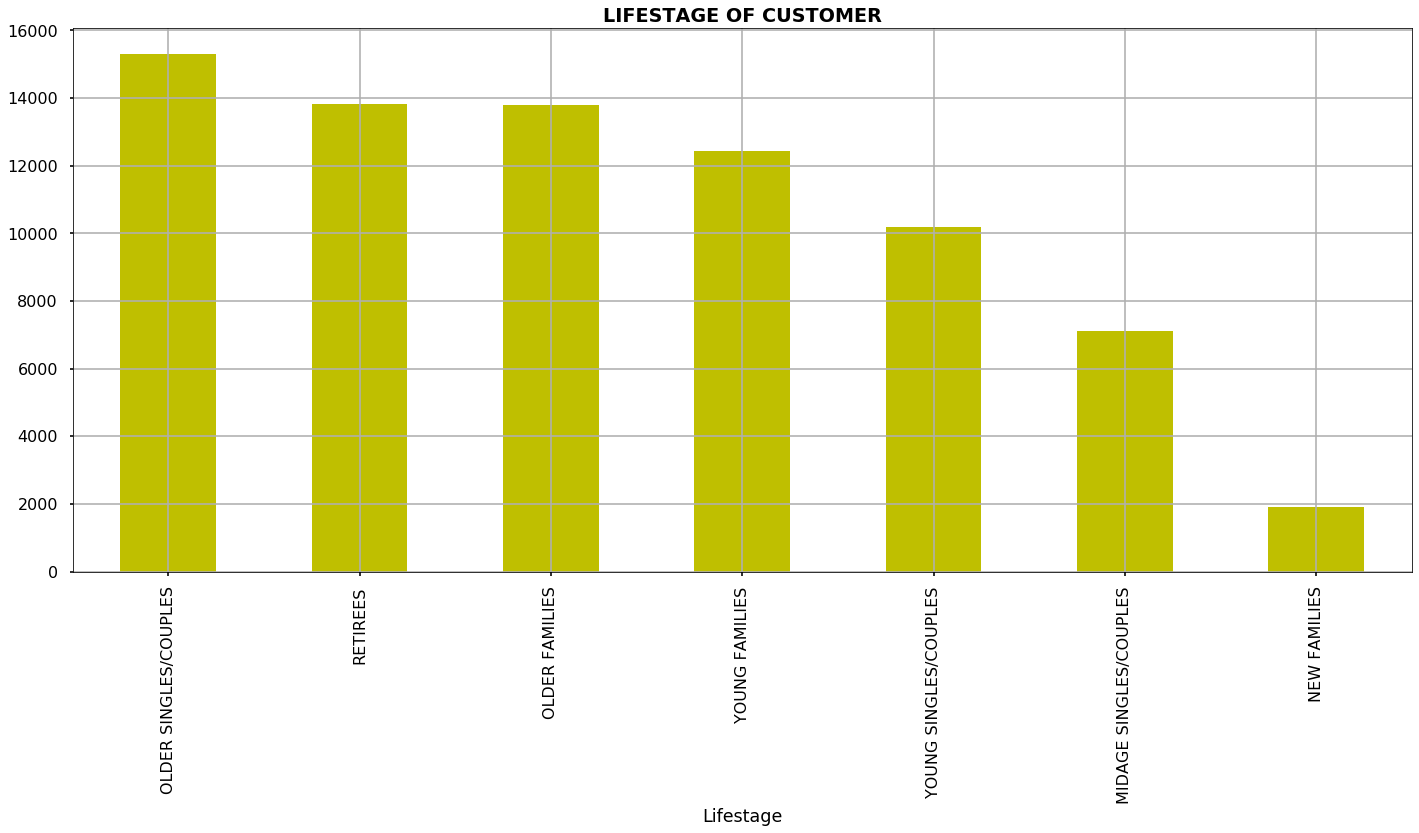

In [50]:
plt.figure(figsize=(24,10))
combined_data.LIFESTAGE.value_counts().plot(kind='bar',color='y',grid=True)
plt.title('LIFESTAGE OF CUSTOMER',fontweight='bold')
plt.xlabel('Lifestage')
plt.show()

### INSIGHTS:

1. Most of the customers are older singles/couples
2. Least amount of customers belong to new families

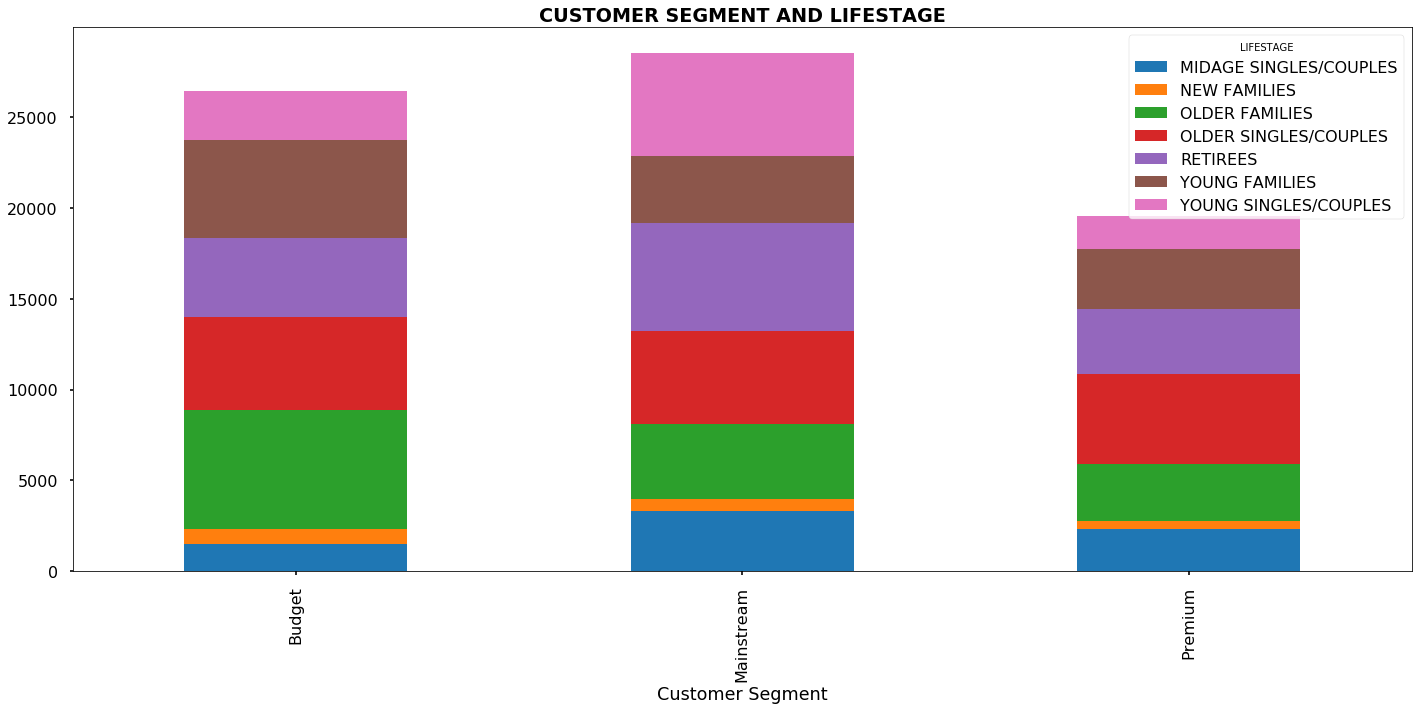

In [51]:
plt.rcParams['figure.figsize'] = (24, 10)
combined_data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).size().unstack().plot(kind='bar',stacked=True)
plt.title('CUSTOMER SEGMENT AND LIFESTAGE',fontweight='bold')
plt.xlabel('Customer Segment')
plt.show()

### INSIGHTS:

1. Older families usually buy budget-rated products however this could be because of the large amount of older families' customers.
2. New and Young families prefer budget-rated products.
3. Midage singles/couples, Young singles/couples and retirees prefer mainstream-rated products.

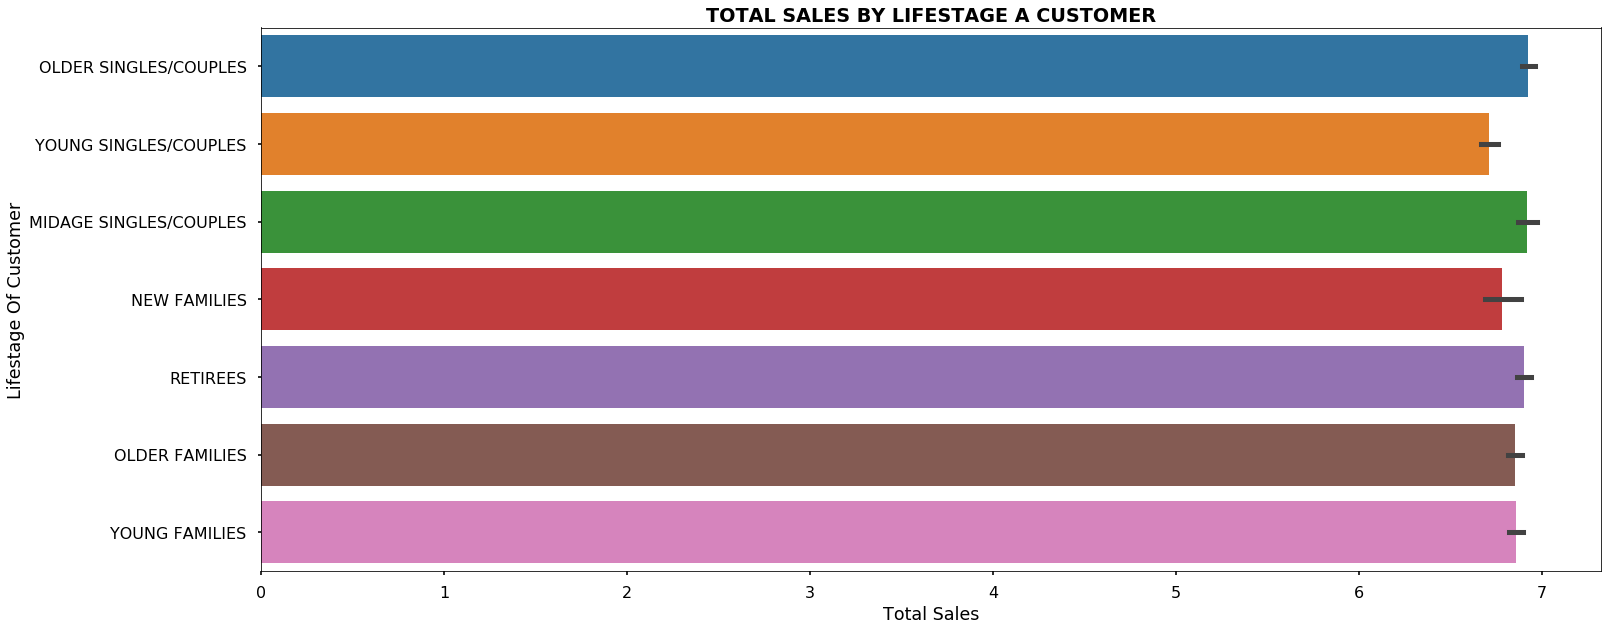

In [52]:
plt.figure(figsize=(24,10))
sns.barplot(x=combined_data['TOT_SALES'], y=combined_data['LIFESTAGE'])
plt.title('TOTAL SALES BY LIFESTAGE A CUSTOMER',fontweight='bold')
plt.ylabel('Lifestage Of Customer')
plt.xlabel('Total Sales')
plt.show()

### INSIGHTS:

1. Older and midage singles/couples generate maximum sales
2. Young singles/couples generate minimum sales

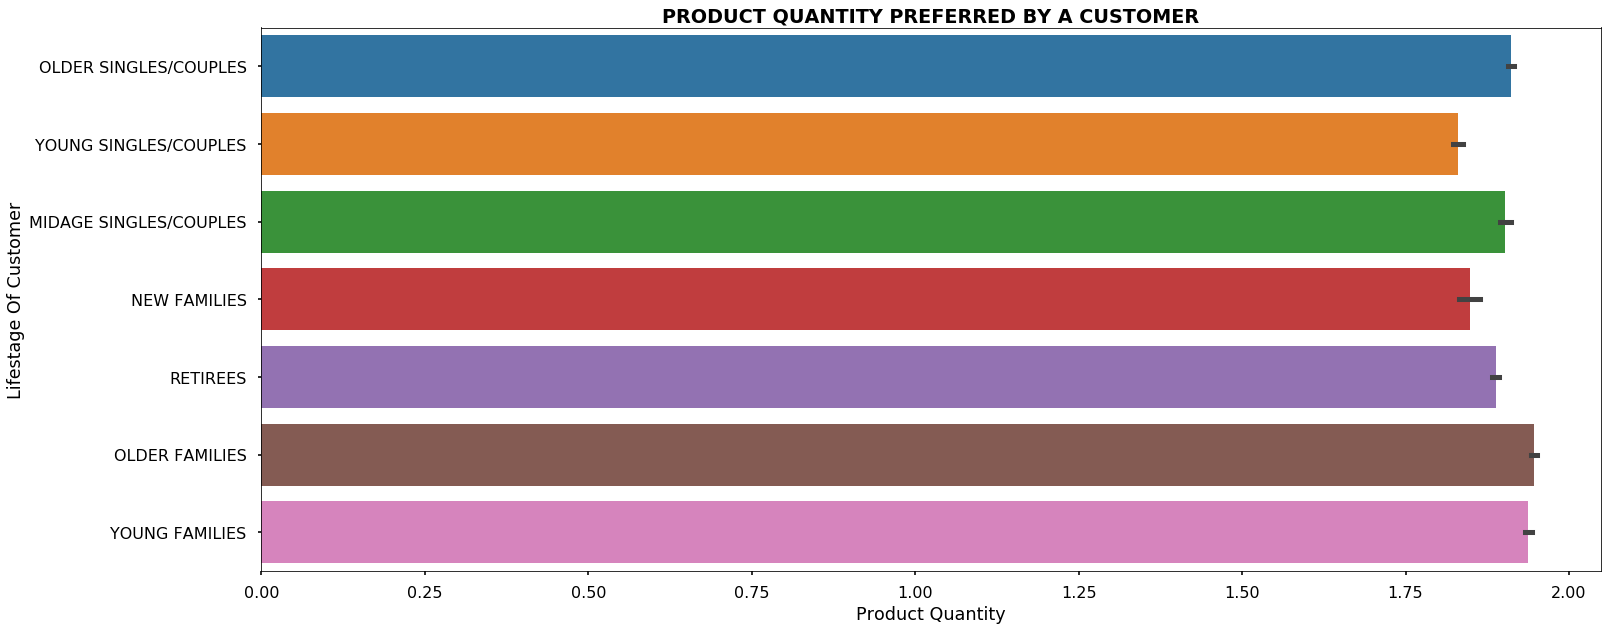

In [53]:
plt.figure(figsize=(24,10))
sns.barplot(x=combined_data['PROD_QTY'], y=combined_data['LIFESTAGE'])
plt.title('PRODUCT QUANTITY PREFERRED BY A CUSTOMER',fontweight='bold')
plt.ylabel('Lifestage Of Customer')
plt.xlabel('Product Quantity')
plt.show()

### INSIGHTS:

1. Older families buy products in maximum quantity
2. Young singles/couples buy products in least quantity

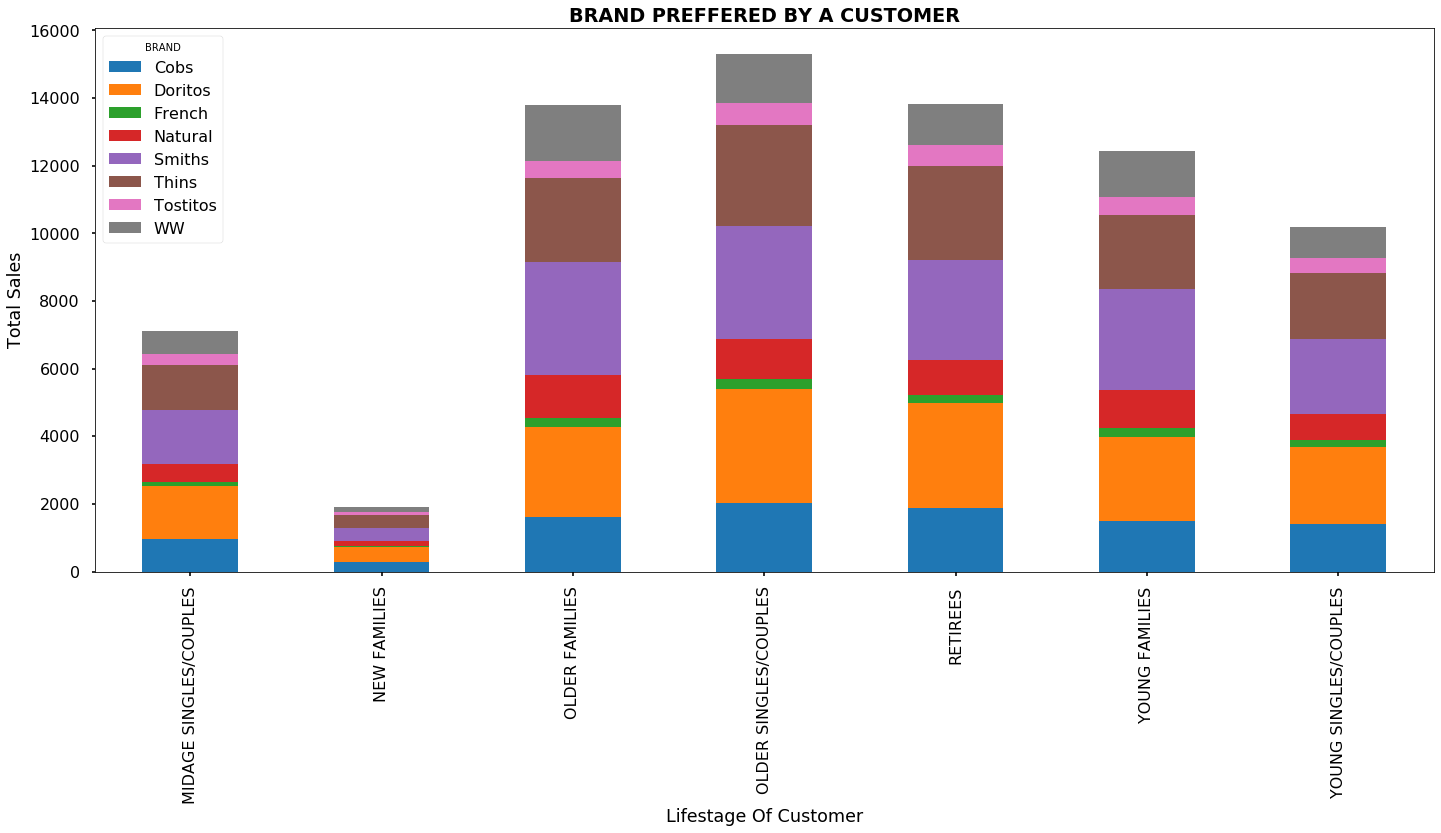

In [54]:
plt.rcParams['figure.figsize'] = (24, 10)
combined_data.groupby(['LIFESTAGE','BRAND']).size().unstack().plot(kind='bar',stacked=True)
plt.title('BRAND PREFFERED BY A CUSTOMER',fontweight='bold')
plt.ylabel('Total Sales')
plt.xlabel('Lifestage Of Customer')
plt.show()

### INSIGHTS:

1. Smiths and Doritos are most preferred by customers of all life stages
2. French and Tositos is the least preferred by customers of all life stages